This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

We begin by importing the necessary libraries from ROOT, as well as some python math libraries.

We also define a canvas that will be used for displaying the results.

In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1
from ROOT import gStyle
from array import array
import math

c1 = TCanvas( 'c1', 'The Fit Canvas', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.SetLogy()

Welcome to JupyROOT 6.16/00


Define a user funcion for fitting the data.

In [2]:
def fitfunction(x,par):
    return par[0]*math.exp(par[1]*x[0]+par[2]*math.pow(x[0],1.5))

Define python arrays to store the data.

In [3]:
altitude = array('d')
temp = array('d')
gravity = array('d')
pressure = array('d')
density = array('d')
viscosity = array('d')

Read data from the filem and store in the above python arrays.

In [4]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        

In [5]:
gStyle.SetOptFit(1)

Define a ROOT fitting object, based upon the above function.  Set initial parameter values and names.

In [6]:
pfit1 = TF1("myfit",fitfunction,0.0,80000.0,3)
pfit1.SetParameters(10,-0.0001,-0.0000001)
pfit1.SetParNames("Amplitude,Linear,Quadratic")

Define a ROOT graph object based upon the altitude and density values.  Fit the data with the user-defined function from above. After the fit, print the parameter values and errors.

In [7]:
gr = TGraph(npoints,altitude,density)
gr.SetMarkerColor(3)
gr.SetMarkerStyle(21)
gr.SetTitle("Density")
gr.GetXaxis().SetTitle("Altitude (m)")
gr.GetYaxis().SetTitle("Density (kg/m^3)")
gr.Fit("myfit","S")

par = [pfit1.GetParameter(i) for i in range( 3 )]
l = 'myfit $p_0$: {:.3g} $p_1$: {:.3g} $p_2$: {:.2f}'.format(*par)
errpar = [pfit1.GetParError(i) for i in range( 3 )]
m = 'myfit $errp_0$: {:.3g} $errp_1$: {:.3g} $errp_2$: {:.2f}'.format(*errpar)
print (l)
print (m)

myfit $p_0$: 12.1 $p_1$: -7.37e-05 $p_2$: -0.00
myfit $errp_0$: 0.0545 $errp_1$: 3.28e-06 $errp_2$: 0.00

****************************************
Minimizer is Minuit / Migrad
Chi2                      =    0.0771096
NDf                       =           17
Edm                       =  1.45528e-08
NCalls                    =           90
Amplitude,Linear,Quadratic =      12.1441   +/-   0.0544973   
p1                        = -7.36624e-05   +/-   3.2756e-06  
p2                        = -3.64757e-07   +/-   3.14587e-08 


Draw the graph, and the canvas.

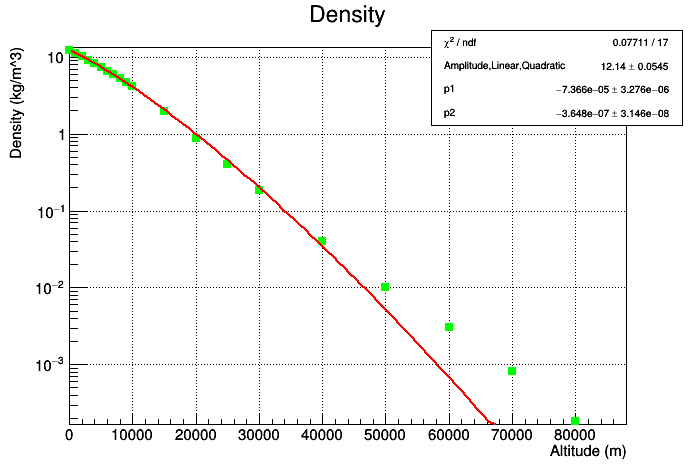

In [8]:
gr.Draw("AP")
c1.Draw()

In [9]:
c1.Update()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 12 )
c1.Modified()
c1.Update()